## Exploratory Data Analysis

### Dictionary:
age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if >50K else 0;* age;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('Solarize_Light2')

In [2]:
census_data = pd.read_csv('https://raw.githubusercontent.com/renfelo/datascience/master/others/data_science/notebooks/city_census/data/census.csv')

In [3]:
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State gov,77516,Bachelors,13,Never married,Adm clerical,Not in family,White,0,2174,0,40,United States,0
1,50,Self emp not inc,83311,Bachelors,13,Married civ spouse,Exec managerial,Husband,White,0,0,0,13,United States,0
2,38,Private,215646,HS grad,9,Divorced,Handlers cleaners,Not in family,White,0,0,0,40,United States,0
3,53,Private,234721,11th,7,Married civ spouse,Handlers cleaners,Husband,Black,0,0,0,40,United States,0
4,28,Private,338409,Bachelors,13,Married civ spouse,Prof specialty,Wife,Black,1,0,0,40,Cuba,0


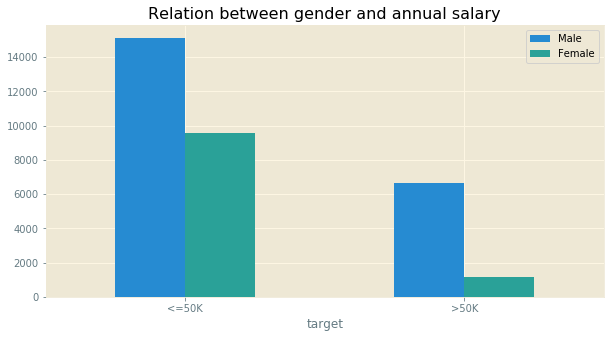

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

pd.crosstab(census_data['target'], 
            census_data['sex']).plot(kind='bar', 
            title='Relation between gender and annual salary', ax=ax)
ax.set_xticklabels(['<=50K', '>50K'], rotation=0)
ax.legend(['Male', 'Female'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


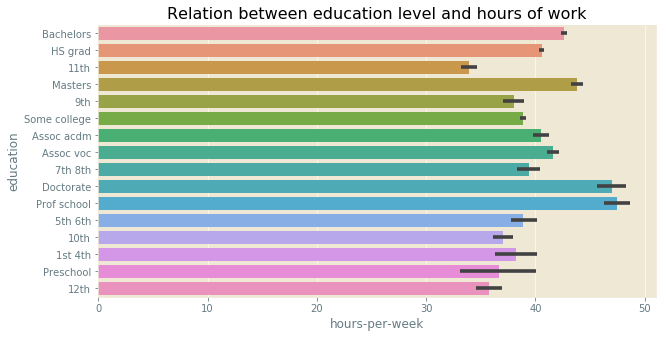

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(census_data['hours-per-week'], census_data['education'], ax=ax) \
.set_title('Relation between education level and hours of work');

## Data Proprocessing

Features¶ age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if >50K else 0;

In [6]:
import pandas as pd
import numpy as np
import re

In [7]:
# Get data directly from UCI ML using `read_table`
raw_data = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', delim_whitespace=True, error_bad_lines=False)

In [8]:
# Security copy
df = raw_data.copy()

In [9]:
df.head()

,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
0,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
1,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
2,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
3,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K
4,"37,","Private,","284582,","Masters,","14,","Married-civ-spouse,","Exec-managerial,","Wife,","White,","Female,","0,","0,","40,","United-States,",<=50K


In [10]:
#There are no column names
df = raw_data.T.reset_index().T.reset_index(drop=True)

#Let's put a name to it now
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
               'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'target']

df.columns = column_names
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K


## Data Wrangling

Let's verify how consistent are the column data and modify if necessary

In [11]:
def verify_data_spread():
    for column in df.columns:
        print(column, ':\n\n')
        print(df[column].value_counts())
        
#verify_data_spread()

In [12]:
# There are just things that I want to modify:
# -> Some columns have an '?' 
#for the missing parameters, let's modify that to 'missing'

def modify_symbol(symbol='?'):
    occurrences = []
    for column in df.columns:
        df[column] = df[column].apply(lambda x: re.sub('[,.;]', '', x))
        df[column] = df[column].apply(lambda x: x.replace('-', ' '))
        for index, value in df[column].items():
            if symbol in value and column not in occurrences:
                occurrences.append(column)
                
    for column in occurrences:
        df[column] = df[column].apply(lambda x: x if '?' not in x else 'missing')
        
modify_symbol()

In [13]:
for column in df.columns:
    #Removing some commas from data
    numerical = ['age', 'fnlwgt', 'education-num', 'capital-loss',
                 'capital-gain', 'hours-per-week']
    
    if column in numerical:
        df[column] = df[column].apply(lambda x: x.split(',')[0] if ','
                                     in x else x)
        df[column] = df[column].astype('int64')

## More Modifications
Some columns can be already modified to boolean ones, like sex and target; There are a bunch of zeros inside some columns, but they are necessary;

In [14]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
32556,27,Private,257302,Assoc acdm,12,Married civ spouse,Tech support,Wife,White,Female,0,0,38,United States,<=50K
32557,40,Private,154374,HS grad,9,Married civ spouse,Machine op inspct,Husband,White,Male,0,0,40,United States,>50K
32558,58,Private,151910,HS grad,9,Widowed,Adm clerical,Unmarried,White,Female,0,0,40,United States,<=50K
32559,22,Private,201490,HS grad,9,Never married,Adm clerical,Own child,White,Male,0,0,20,United States,<=50K
32560,52,Self emp inc,287927,HS grad,9,Married civ spouse,Exec managerial,Wife,White,Female,15024,0,40,United States,>50K


In [15]:
df['sex'].value_counts(), df['target'].value_counts()

(Male      21790
 Female    10771
 Name: sex, dtype: int64, <=50K    24720
 >50K      7841
 Name: target, dtype: int64)

In [16]:
# Booleanizing (huh) categories
df['sex'] = df.sex.apply(lambda x: 1 if 'Female' in x else 0)
df['target'] = df.target.apply(lambda x: 1 if '>50K' in x else 0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State gov,77516,Bachelors,13,Never married,Adm clerical,Not in family,White,0,2174,0,40,United States,0
1,50,Self emp not inc,83311,Bachelors,13,Married civ spouse,Exec managerial,Husband,White,0,0,0,13,United States,0
2,38,Private,215646,HS grad,9,Divorced,Handlers cleaners,Not in family,White,0,0,0,40,United States,0
3,53,Private,234721,11th,7,Married civ spouse,Handlers cleaners,Husband,Black,0,0,0,40,United States,0
4,28,Private,338409,Bachelors,13,Married civ spouse,Prof specialty,Wife,Black,1,0,0,40,Cuba,0


In [17]:
df['sex'].value_counts(), df['target'].value_counts()

(0    21790
 1    10771
 Name: sex, dtype: int64, 0    24720
 1     7841
 Name: target, dtype: int64)

## Estimators

Features¶ age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if >50K else 0;

### Let's create our X and y variables

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Taking a sample from the entire population
sample = df.iloc[:10000]
X = sample.drop('target', axis=1)
y = sample['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Data Imputation

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

Let's import our model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

Pipeline to impute missing data and convert categorical columns into numbers

In [22]:
categorical_features = ['workclass', 'education', 'marital-status', 
                        'occupation', 'relationship', 'race', 'native-country']
categorical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_features = ['age', 'fnlwgt', 'education-num', 'sex', 'capital-loss',
                     'capital-gain', 'hours-per-week']
numerical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_imputer, categorical_features),
    ('num', numerical_imputer, numerical_features)
])

### Functions to get the base scores for each model

Please notice that my computer doesn't have enough power to fit all the dataset entries, so I've reduced to a sample of 10K only

In [23]:
def get_base_prediction(model_dict):
    scores = {}
    for name, model in model_dict.items():
        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        model.fit(X_train, y_train)
        scores[name] = f'{model.score(X_test, y_test) * 100}%'
        
    return scores

get_base_prediction({'random_forest': RandomForestClassifier(),
                    'k_neighbors': KNeighborsClassifier(),
                    'linear_svc': LinearSVC()})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'random_forest': '84.45%', 'k_neighbors': '77.55%', 'linear_svc': '78.5%'}

## Hyperparameters tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### RandomizedSearch CV

In [25]:
rf_grid = {
    'model__n_estimators': np.arange(250, 350, 5),
    'model__max_depth': np.arange(30, 60, 5),
    'model__min_split': np.arange(5, 15, 5),
    'model__min_samples_leaf': np.arange(0, 10, 1)
}

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_jobs=-1))
])

rscv = RandomizedSearchCV(model, param_distributions=rf_grid, n_iter=30)

#rscv.fit(X_train, y_train)
#print(rscv.best_params_)
#print(f'{rscv.score(X_test, y_test) * 100}%')

In [26]:
rsrf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_jobs=-1, n_estimators=285, 
                                     min_samples_split=10,
                                    min_samples_leaf= 2, max_depth=45))
])

rsrf_model.fit(X_train, y_train)
print(f'Tuned modelscore: {rsrf_model.score(X_test, y_test) * 100}%')

Tuned modelscore: 86.5%


### GridSearch CV

In [27]:
rf_grid = {
    'model__n_estimators': [250, 280, 300],
    'model__max_depth' : [45, 50, 55], 
    'model__min_samples_split':[10, 12],
    'model__min_samples_leaf': [1, 3, 5]
}

model = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_jobs=-1))
])

gscv = GridSearchCV(model, param_grid=rf_grid, n_jobs=-1)
gscv.fit(X_train, y_train)
print(gscv.best_params_)
print(f'{gscv.score(X_test, y_test) * 100}%')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__max_depth': 55, 'model__min_samples_leaf': 3, 'model__min_samples_split': 10, 'model__n_estimators': 280}
86.95%


### Model Evaluation

In [28]:
from sklearn.metrics import classification_report

In [29]:
y_preds = rsrf_model.predict(X_test)
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,micro avg,macro avg,weighted avg
f1-score,0.915572,0.663342,0.865,0.789457,0.856424
precision,0.878224,0.798799,0.865,0.838512,0.859599
recall,0.956238,0.567164,0.865,0.761701,0.865000
support,1531.000000,469.000000,2000.000,2000.000000,2000.000000
